In [1]:
# Import Time
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as stats

In [2]:
# Read in the raw data from Zillow
inventory_df = pd.read_csv(Path("resources/invt_all.csv")) #Inventory - All tiers
saleprice_df = pd.read_csv(Path("resources/median_sale_price_all.csv")) #Median Sale Price - All tiers
zori_df = pd.read_csv(Path("resources/zori_all.csv")) #Zillow Observed Rent Index - All tiers
zhvi_low_df = pd.read_csv(Path("resources/zhvi_low.csv")) #Zillow Home Value Index - Low Tier
zhvi_mid_df = pd.read_csv(Path("resources/zhvi_mid.csv")) #Zillow Home Value Index - Mid Tier
zhvi_top_df = pd.read_csv(Path("resources/zhvi_top.csv")) #Zillow Home Value Index - Top Tier


### Data Preprocessing Script

**Inventory dataset preprocessing**

In [3]:
# Read the Inventory DataFrame
inventory_df.head(50)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,102001,0,United States,country,NaN,1360756.0,1388126.0,1515702.0,1596751.0,1664788.0,...,1077709.0,1056644.0,963356.0,847668.0,841363.0,803900.0,861023.0,872580.0,907907.0,939926.0
1,394913,1,"New York, NY",msa,NY,66530.0,74575.0,80016.0,86445.0,91131.0,...,58995.0,56084.0,51270.0,43845.0,42633.0,41911.0,45216.0,45463.0,46808.0,46268.0
2,753899,2,"Los Angeles, CA",msa,CA,19893.0,21994.0,24106.0,25253.0,27455.0,...,21529.0,20888.0,19013.0,15910.0,15377.0,14858.0,15407.0,15043.0,15398.0,15652.0
3,394463,3,"Chicago, IL",msa,IL,34633.0,37046.0,44063.0,45649.0,47560.0,...,30791.0,29600.0,25921.0,21500.0,20889.0,20098.0,21779.0,21766.0,22727.0,23607.0
4,394514,4,"Dallas, TX",msa,TX,23048.0,23331.0,25749.0,28549.0,30376.0,...,22442.0,21856.0,20203.0,17895.0,17582.0,15841.0,17736.0,20300.0,21925.0,22968.0
5,394692,5,"Houston, TX",msa,TX,24367.0,24556.0,27931.0,29593.0,31377.0,...,23371.0,23257.0,21816.0,20172.0,20353.0,19670.0,21499.0,21408.0,21863.0,23057.0
6,395209,6,"Washington, DC",msa,VA,17807.0,19395.0,23583.0,27420.0,27536.0,...,16081.0,15234.0,13082.0,10351.0,9836.0,9008.0,10926.0,11433.0,11542.0,11446.0
7,394974,7,"Philadelphia, PA",msa,PA,23200.0,24463.0,26727.0,29130.0,30133.0,...,15831.0,15727.0,14136.0,11869.0,11775.0,11396.0,12564.0,12663.0,12931.0,12984.0
8,394856,8,"Miami, FL",msa,FL,55185.0,54776.0,56371.0,54744.0,52965.0,...,31645.0,32506.0,32720.0,32358.0,34739.0,34179.0,34435.0,32306.0,31855.0,30877.0
9,394347,9,"Atlanta, GA",msa,GA,24273.0,24201.0,26816.0,28053.0,28795.0,...,24211.0,23779.0,21850.0,19630.0,19039.0,17786.0,18626.0,18198.0,18805.0,19655.0


In [4]:
# Obtain basic information on the dataset
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    928 non-null    int64  
 1   SizeRank    928 non-null    int64  
 2   RegionName  928 non-null    object 
 3   RegionType  928 non-null    object 
 4   StateName   927 non-null    object 
 5   2018-01-31  899 non-null    float64
 6   2018-02-28  899 non-null    float64
 7   2018-03-31  899 non-null    float64
 8   2018-04-30  899 non-null    float64
 9   2018-05-31  899 non-null    float64
 10  2018-06-30  900 non-null    float64
 11  2018-07-31  900 non-null    float64
 12  2018-08-31  900 non-null    float64
 13  2018-09-30  900 non-null    float64
 14  2018-10-31  900 non-null    float64
 15  2018-11-30  900 non-null    float64
 16  2018-12-31  900 non-null    float64
 17  2019-01-31  900 non-null    float64
 18  2019-02-28  900 non-null    float64
 19  2019-03-31  900 non-null    f

In [5]:
# See if there is missing data and address as needed
total_fields = inventory_df.size
missing_fields = (inventory_df.isnull().sum()).sum()
rate = (missing_fields / total_fields) * 100
if rate <= 5.00:
    print(f'Error rate is less than 5% ({rate:.2f}%)')
else:
    print(f'Dataset has a {rate:.2f}% missing data rate')

Error rate is less than 5% (1.91%)


**Saleprice dataset preprocessing**

In [6]:
# Read the Sale Price DataFrame
saleprice_df.head(50)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31
0,102001,0,United States,country,NaN,180000.0,185000.0,186900.0,189000.0,195000.0,...,345000.0,340000.0,335000.0,325000.0,320000.0,320000.0,330000.0,340000.0,350000.0,360000.0
1,394913,1,"New York, NY",msa,NY,401251.0,395500.0,400000.0,400000.0,405000.0,...,570000.0,545000.0,525000.0,522250.0,513765.0,520000.0,505050.0,515250.0,540000.0,565000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,495000.0,500000.0,490000.0,481250.0,...,865000.0,850000.0,841000.0,830000.0,810000.0,815000.0,825000.0,841750.0,850000.0,869000.0
3,394463,3,"Chicago, IL",msa,IL,237000.0,242000.0,239000.0,244000.0,254750.0,...,295000.0,285000.0,275000.0,275000.0,270000.0,270000.0,275000.0,295000.0,305000.0,319000.0
4,394514,4,"Dallas, TX",msa,TX,137000.0,146700.0,144000.0,149900.0,155000.0,...,399500.0,387900.0,385000.0,375000.0,360000.0,355000.0,372000.0,374500.0,385000.0,395000.0
5,394692,5,"Houston, TX",msa,TX,143900.0,143000.0,143825.0,149000.0,155000.0,...,325000.0,325000.0,314000.0,310000.0,309000.0,299900.0,308000.0,315000.0,320000.0,330000.0
6,395209,6,"Washington, DC",msa,VA,352000.0,350000.0,358000.0,365000.0,370000.0,...,500000.0,475000.0,484700.0,475000.0,457500.0,449000.0,480000.0,498750.0,530000.0,550000.0
7,394974,7,"Philadelphia, PA",msa,PA,205000.0,211400.0,210000.0,222000.0,229000.0,...,330000.0,320000.0,313900.0,315000.0,309000.0,300000.0,300000.0,315000.0,316000.0,335000.0
8,394856,8,"Miami, FL",msa,FL,245000.0,240000.0,245000.0,242900.0,252025.0,...,415000.0,410000.0,415000.0,410000.0,400000.0,416000.0,425000.0,435000.0,449450.0,450000.0
9,394347,9,"Atlanta, GA",msa,GA,169000.0,172950.0,175000.0,179900.0,182800.0,...,370000.0,360000.0,355900.0,350000.0,347000.0,335000.0,349000.0,359500.0,367000.0,375000.0


In [7]:
# Obtain basic information on the dataset
saleprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Columns: 189 entries, RegionID to 2023-05-31
dtypes: float64(184), int64(2), object(3)
memory usage: 955.5+ KB


In [8]:
# See if there is missing data and address as needed
total_fields = saleprice_df.size
missing_fields = (saleprice_df.isnull().sum()).sum()
rate = (missing_fields / total_fields) * 100
if rate <= 5.00:
    print(f'Error rate is less than 5% ({rate:.2f}%)')
else:
    print(f'Dataset has a {rate:.2f}% missing data rate')

Dataset has a 22.85% missing data rate


In [9]:
# See if there is missing data and address as needed
saleprice_df.isnull().sum()

RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      1
              ..
2023-01-31    69
2023-02-28    52
2023-03-31    24
2023-04-30    17
2023-05-31     0
Length: 189, dtype: int64

**Observed Rent Index dataset preprocessing**

In [10]:
# Read the Observed Rent Index DataFrame
zori_df.head(50)

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,102001,0,United States,country,NaN,1300.062229,1307.080005,1316.310356,1326.393130,1336.439921,...,2014.250561,2014.094708,2009.012292,2005.244310,2005.033366,2010.012117,2018.271884,2029.329407,2042.199479,2053.895556
1,394913,1,"New York, NY",msa,NY,2475.313804,2491.999171,2510.649267,2534.100262,2550.171304,...,3332.655016,3313.507710,3276.931534,3251.478248,3243.246585,3259.055030,3285.399008,3324.429687,3365.688061,3404.838967
2,753899,2,"Los Angeles, CA",msa,CA,1904.292137,1916.483629,1932.049652,1946.294240,1961.089204,...,2957.369106,2955.110308,2946.882246,2940.446816,2935.179864,2940.045800,2949.136280,2964.319666,2972.332684,2982.773017
3,394463,3,"Chicago, IL",msa,IL,1488.968336,1497.098751,1508.713686,1519.510776,1530.903848,...,1957.170145,1957.457287,1953.219199,1954.529453,1959.161341,1971.783036,1985.314746,2002.652499,2027.425159,2049.848565
4,394514,4,"Dallas, TX",msa,TX,1160.170399,1165.080157,1173.252310,1183.978198,1194.746162,...,1857.557867,1847.884074,1837.851422,1827.707540,1823.280236,1825.236843,1830.939832,1835.257698,1842.765673,1852.860051
5,394692,5,"Houston, TX",msa,TX,1284.993019,1289.316838,1296.100731,1308.464539,1319.069012,...,1669.783064,1665.800323,1663.006181,1662.040433,1669.062784,1676.207237,1685.639978,1690.102134,1699.753009,1710.390225
6,395209,6,"Washington, DC",msa,VA,1800.187787,1807.294443,1819.069226,1826.367690,1836.448187,...,2313.257402,2301.465913,2286.686719,2273.063825,2269.054998,2278.751145,2291.906764,2309.960472,2329.806623,2352.452784
7,394974,7,"Philadelphia, PA",msa,PA,1323.070219,1329.516802,1342.762821,1350.775297,1358.145994,...,1838.348890,1835.430781,1834.148157,1829.340665,1831.831124,1831.826943,1837.499094,1844.010697,1856.276157,1864.129997
8,394856,8,"Miami, FL",msa,FL,1585.231986,1592.386004,1597.991474,1605.033076,1614.632083,...,2790.871519,2801.587479,2815.217263,2817.100644,2813.360285,2810.981068,2816.553700,2825.426238,2833.566839,2838.949319
9,394347,9,"Atlanta, GA",msa,GA,1091.352550,1097.171542,1100.539379,1111.800156,1120.065781,...,1990.098312,1984.695144,1976.284486,1975.867329,1972.831402,1975.836154,1976.233241,1985.218616,1990.159234,1991.414165


In [11]:
# Obtain basic information on the dataset
zori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Columns: 107 entries, RegionID to 2023-06-30
dtypes: float64(102), int64(2), object(3)
memory usage: 520.1+ KB


In [12]:
# See if there is missing data and address as needed
total_fields = zori_df.size
missing_fields = (zori_df.isnull().sum()).sum()
rate = (missing_fields / total_fields) * 100
if rate <= 5.00:
    print(f'Error rate is less than 5% ({rate:.2f}%)')
else:
    print(f'Dataset has a {rate:.2f}% missing data rate')

Dataset has a 48.05% missing data rate


In [13]:
# See if there is missing data and address as needed
zori_df.isnull().sum()

RegionID        0
SizeRank        0
RegionName      0
RegionType      0
StateName       1
             ... 
2023-02-28    162
2023-03-31    136
2023-04-30    111
2023-05-31     65
2023-06-30      0
Length: 107, dtype: int64

**Zillow Home Value Index dataset preprocessing**

In [14]:
# A note on the ZHVI:
    # ZHVI represents the “typical” home value for a region. 
    # It’s calculated as a weighted average of the middle third of homes in a given region. 
    # The typical home value for the region is NOT the “median home value.”

In [15]:
# Merge the three ZHVI datasets (columns without the subscript are Mid Tier)
df_1 = pd.merge(zhvi_low_df, zhvi_top_df, on="RegionID", suffixes=("_low","_top"))
zhvi_all_df = pd.merge(df_1, zhvi_mid_df, on="RegionID")

zhvi_all_df.head()

,RegionID,SizeRank_low,RegionName_low,RegionType_low,StateName_low,2000-01-31_low,2000-02-29_low,2000-03-31_low,2000-04-30_low,2000-05-31_low,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,102001,0,United States,country,NaN,48205.157126,48277.602146,48370.517257,48576.973316,48823.732994,...,343163.762567,341495.863150,338680.235873,334380.232063,334104.950911,334255.303781,337164.650040,340651.000511,345348.135519,350212.518429
1,394913,1,"New York, NY",msa,NY,102107.057069,102506.922494,102897.973204,103709.380919,104559.587219,...,597814.714791,595366.022117,592449.452080,585536.591188,589612.342031,590313.476222,593300.529394,598374.486199,607537.383282,617791.645472
2,753899,2,"Los Angeles, CA",msa,CA,124854.660790,125220.426299,125798.067126,126949.232583,128261.422042,...,886239.620947,878189.809467,869918.808280,857676.526998,851842.449813,853030.136536,862696.711890,872057.545426,886061.795424,902809.343544
3,394463,3,"Chicago, IL",msa,IL,57482.934649,57529.898148,57627.649694,57848.486019,58118.096926,...,295446.085115,293927.114794,291500.374718,287854.849568,289641.216564,288989.250174,291189.289450,295620.503018,301140.510067,307485.214569
4,394514,4,"Dallas, TX",msa,TX,63433.381496,63451.170753,63463.701517,63527.553952,63635.820449,...,380848.306668,377472.021732,372964.299358,367078.695043,364430.244332,364007.460253,366353.967688,369210.684274,373183.374727,376958.721618


In [16]:
# Merging the datasets created duplicate columns that can be dropped
zhvi_all_df.drop(['SizeRank', 'RegionName', 'RegionType', 'StateName', 
                 'SizeRank_top', 'RegionName_top', 'RegionType_top', 'StateName_top'], 
                 axis=1, inplace=True
                )
zhvi_all_df.columns

Index(['RegionID', 'SizeRank_low', 'RegionName_low', 'RegionType_low',
       'StateName_low', '2000-01-31_low', '2000-02-29_low', '2000-03-31_low',
       '2000-04-30_low', '2000-05-31_low',
       ...
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30'],
      dtype='object', length=898)

In [17]:
# Rename the datatype columns that have x_low on them
zhvi_all_df.rename(columns=
{
    'SizeRank_low': 'SizeRank',
    'RegionName_low': 'RegionName',
    'RegionType_low': 'RegionType',
    'StateName_low': 'StateName'
}, inplace=True)

zhvi_all_df.head(50)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31_low,2000-02-29_low,2000-03-31_low,2000-04-30_low,2000-05-31_low,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,102001,0,United States,country,NaN,48205.157126,48277.602146,48370.517257,48576.973316,48823.732994,...,3.431638e+05,3.414959e+05,3.386802e+05,3.343802e+05,3.341050e+05,3.342553e+05,3.371647e+05,3.406510e+05,3.453481e+05,3.502125e+05
1,394913,1,"New York, NY",msa,NY,102107.057069,102506.922494,102897.973204,103709.380919,104559.587219,...,5.978147e+05,5.953660e+05,5.924495e+05,5.855366e+05,5.896123e+05,5.903135e+05,5.933005e+05,5.983745e+05,6.075374e+05,6.177916e+05
2,753899,2,"Los Angeles, CA",msa,CA,124854.660790,125220.426299,125798.067126,126949.232583,128261.422042,...,8.862396e+05,8.781898e+05,8.699188e+05,8.576765e+05,8.518424e+05,8.530301e+05,8.626967e+05,8.720575e+05,8.860618e+05,9.028093e+05
3,394463,3,"Chicago, IL",msa,IL,57482.934649,57529.898148,57627.649694,57848.486019,58118.096926,...,2.954461e+05,2.939271e+05,2.915004e+05,2.878548e+05,2.896412e+05,2.889893e+05,2.911893e+05,2.956205e+05,3.011405e+05,3.074852e+05
4,394514,4,"Dallas, TX",msa,TX,63433.381496,63451.170753,63463.701517,63527.553952,63635.820449,...,3.808483e+05,3.774720e+05,3.729643e+05,3.670787e+05,3.644302e+05,3.640075e+05,3.663540e+05,3.692107e+05,3.731834e+05,3.769587e+05
5,394692,5,"Houston, TX",msa,TX,59143.888654,59157.358757,59121.526850,59150.910399,59175.627716,...,3.081720e+05,3.064921e+05,3.038863e+05,3.000169e+05,2.979885e+05,2.979303e+05,3.000460e+05,3.016118e+05,3.041500e+05,3.071754e+05
6,395209,6,"Washington, DC",msa,VA,97780.105749,97854.605365,97990.321867,98284.607443,98730.392918,...,5.283652e+05,5.257020e+05,5.231967e+05,5.184416e+05,5.183291e+05,5.196050e+05,5.257691e+05,5.321315e+05,5.396443e+05,5.457670e+05
7,394974,7,"Philadelphia, PA",msa,PA,50822.158205,50928.001001,51004.931472,51192.650160,51393.913932,...,3.294489e+05,3.290183e+05,3.276739e+05,3.250689e+05,3.265054e+05,3.269640e+05,3.304517e+05,3.348951e+05,3.408821e+05,3.466615e+05
8,394856,8,"Miami, FL",msa,FL,44817.794180,44942.902477,45076.436095,45348.134073,45616.315053,...,4.441808e+05,4.454393e+05,4.450228e+05,4.411215e+05,4.404447e+05,4.419007e+05,4.459596e+05,4.507327e+05,4.560022e+05,4.636156e+05
9,394347,9,"Atlanta, GA",msa,GA,59709.366347,59857.557167,60032.191014,60406.161015,60826.041838,...,3.739868e+05,3.718079e+05,3.683691e+05,3.635168e+05,3.621451e+05,3.612593e+05,3.634773e+05,3.663769e+05,3.710540e+05,3.755530e+05


In [18]:
# See if there is missing data and address as needed
total_fields = zhvi_all_df.size
missing_fields = (zhvi_all_df.isnull().sum()).sum()
rate = (missing_fields / total_fields) * 100
if rate <= 5.00:
    print(f'Error rate is less than 5% ({rate:.2f}%)')
else:
    print(f'Dataset has a {rate:.2f}% missing data rate')

Dataset has a 18.32% missing data rate


### Exploratory Data Analysis (EDA)

**EDA for the Inventory dataset**

In [19]:
# Display the Inventory DataFrame
inventory_df.head(50)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,102001,0,United States,country,NaN,1360756.0,1388126.0,1515702.0,1596751.0,1664788.0,...,1077709.0,1056644.0,963356.0,847668.0,841363.0,803900.0,861023.0,872580.0,907907.0,939926.0
1,394913,1,"New York, NY",msa,NY,66530.0,74575.0,80016.0,86445.0,91131.0,...,58995.0,56084.0,51270.0,43845.0,42633.0,41911.0,45216.0,45463.0,46808.0,46268.0
2,753899,2,"Los Angeles, CA",msa,CA,19893.0,21994.0,24106.0,25253.0,27455.0,...,21529.0,20888.0,19013.0,15910.0,15377.0,14858.0,15407.0,15043.0,15398.0,15652.0
3,394463,3,"Chicago, IL",msa,IL,34633.0,37046.0,44063.0,45649.0,47560.0,...,30791.0,29600.0,25921.0,21500.0,20889.0,20098.0,21779.0,21766.0,22727.0,23607.0
4,394514,4,"Dallas, TX",msa,TX,23048.0,23331.0,25749.0,28549.0,30376.0,...,22442.0,21856.0,20203.0,17895.0,17582.0,15841.0,17736.0,20300.0,21925.0,22968.0
5,394692,5,"Houston, TX",msa,TX,24367.0,24556.0,27931.0,29593.0,31377.0,...,23371.0,23257.0,21816.0,20172.0,20353.0,19670.0,21499.0,21408.0,21863.0,23057.0
6,395209,6,"Washington, DC",msa,VA,17807.0,19395.0,23583.0,27420.0,27536.0,...,16081.0,15234.0,13082.0,10351.0,9836.0,9008.0,10926.0,11433.0,11542.0,11446.0
7,394974,7,"Philadelphia, PA",msa,PA,23200.0,24463.0,26727.0,29130.0,30133.0,...,15831.0,15727.0,14136.0,11869.0,11775.0,11396.0,12564.0,12663.0,12931.0,12984.0
8,394856,8,"Miami, FL",msa,FL,55185.0,54776.0,56371.0,54744.0,52965.0,...,31645.0,32506.0,32720.0,32358.0,34739.0,34179.0,34435.0,32306.0,31855.0,30877.0
9,394347,9,"Atlanta, GA",msa,GA,24273.0,24201.0,26816.0,28053.0,28795.0,...,24211.0,23779.0,21850.0,19630.0,19039.0,17786.0,18626.0,18198.0,18805.0,19655.0


In [20]:
# Get a list of the columns to be used in the next step
print(inventory_df.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
       '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
       '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
       '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
       '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
       '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
       '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
       '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
    

**Question 1: What does housing inventory in Arizona look like?**

In [21]:
# Create a Summary Table of the MSA of Arizona for current inventory
az_summary = inventory_df.loc[inventory_df["StateName"] == "AZ"]
az_summary = az_summary[['RegionName','SizeRank', '2023-06-30']]
az_summary.reset_index(drop=True, inplace=True)

# Rename Columns
az_summary.rename(columns = {"SizeRank":"Population Rank",
                            "RegionName": "Metro Area",
                            "2023-06-30": "Current Inventory June 2023"
                            }, inplace=True)

# Create a column to show inventory as a percent
az_summary["As %"] = az_summary["Current Inventory June 2023"] / az_summary["Current Inventory June 2023"].sum() *100
az_summary["As %"] = az_summary["As %"].apply("{:.2f}%".format)
az_summary

,Metro Area,Population Rank,Current Inventory June 2023,As %
0,"Phoenix, AZ",11,16125.0,65.97%
1,"Tucson, AZ",54,2378.0,9.73%
2,"Prescott Valley, AZ",198,1452.0,5.94%
3,"Lake Havasu City, AZ",218,1569.0,6.42%
4,"Yuma, AZ",225,469.0,1.92%
5,"Flagstaff, AZ",302,596.0,2.44%
6,"Sierra Vista, AZ",335,547.0,2.24%
7,"Show Low, AZ",372,670.0,2.74%
8,"Payson, AZ",583,377.0,1.54%
9,"Nogales, AZ",625,177.0,0.72%


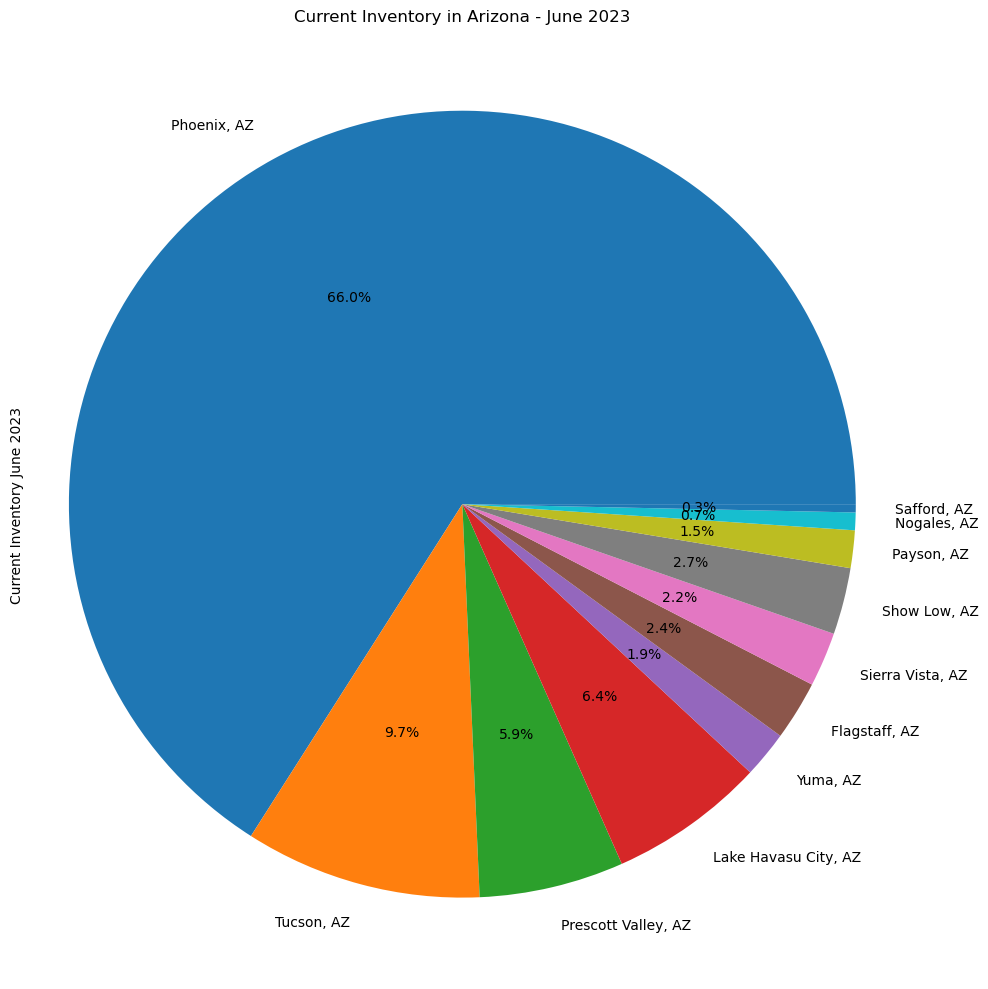

In [22]:
# Create a Pie Chart for Arizona MSA
az_summary.plot(kind='pie', y='Current Inventory June 2023',
                labels=az_summary["Metro Area"], autopct='%1.1f%%',
                title="Current Inventory in Arizona - June 2023",
                legend=False, figsize=(10, 10)
               )
plt.axis('equal')
plt.tight_layout()

# Show the pie chart
plt.show()


**How has inventory changed in the Phoenix MSA over the past five years?**

In [23]:
# Create an Phoenix specific DataFrame
phx_inv = inventory_df.loc[(inventory_df["RegionName"] == "Phoenix, AZ")]

# Using the printed list of columns, select the RegionName and dates only
phx_inv = phx_inv[['RegionName',
       '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
       '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
       '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
       '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
       '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
       '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
       '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
       '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
       '2023-06-30']]

# Transpose the dataset to make columns contain specific information to only the MSA
phx_t = phx_inv.transpose().reset_index()

# This will move the city name into the index and make the DataFrame more readable
phx_t.columns = phx_t.iloc[0]
phx_t = phx_t.iloc[1:]
phx_t.rename(columns = {"RegionName":"Date"}, inplace=True)

# Review the DataFrame
phx_t

,Date,"Phoenix, AZ"
1,2018-01-31,25768.0
2,2018-02-28,26865.0
3,2018-03-31,28519.0
4,2018-04-30,28333.0
5,2018-05-31,27669.0
...,...,...
62,2023-02-28,19896.0
63,2023-03-31,19846.0
64,2023-04-30,18567.0
65,2023-05-31,17171.0


In [24]:
# Convert Date to Datetime and remove duplicates
phx_t["Date"] = pd.to_datetime(phx_t["Date"])
phx_t = phx_t.loc[~phx_t.index.duplicated(keep='first')]

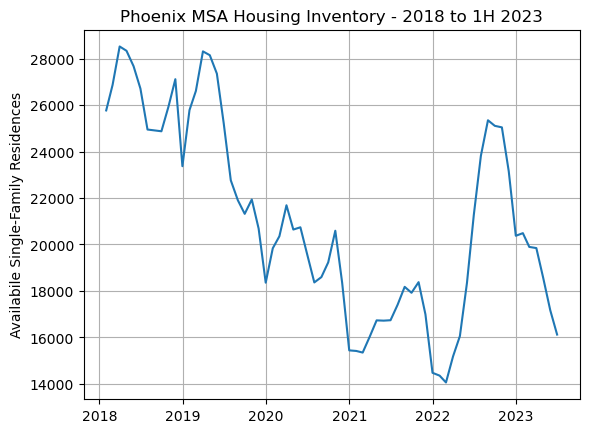

In [25]:
# Create lists to plot
date = phx_t["Date"]
phx = phx_t["Phoenix, AZ"]

# Create the plot
plt.plot(date, phx)

# Add chart elements
plt.title("Phoenix MSA Housing Inventory - 2018 to 1H 2023")
plt.ylabel("Availabile Single-Family Residences")
plt.grid(True)
plt.show()

**Is there a correlation to a MSA size and available inventory?**

In [26]:
# Bring up the AZ summary table
az_summary

,Metro Area,Population Rank,Current Inventory June 2023,As %
0,"Phoenix, AZ",11,16125.0,65.97%
1,"Tucson, AZ",54,2378.0,9.73%
2,"Prescott Valley, AZ",198,1452.0,5.94%
3,"Lake Havasu City, AZ",218,1569.0,6.42%
4,"Yuma, AZ",225,469.0,1.92%
5,"Flagstaff, AZ",302,596.0,2.44%
6,"Sierra Vista, AZ",335,547.0,2.24%
7,"Show Low, AZ",372,670.0,2.74%
8,"Payson, AZ",583,377.0,1.54%
9,"Nogales, AZ",625,177.0,0.72%


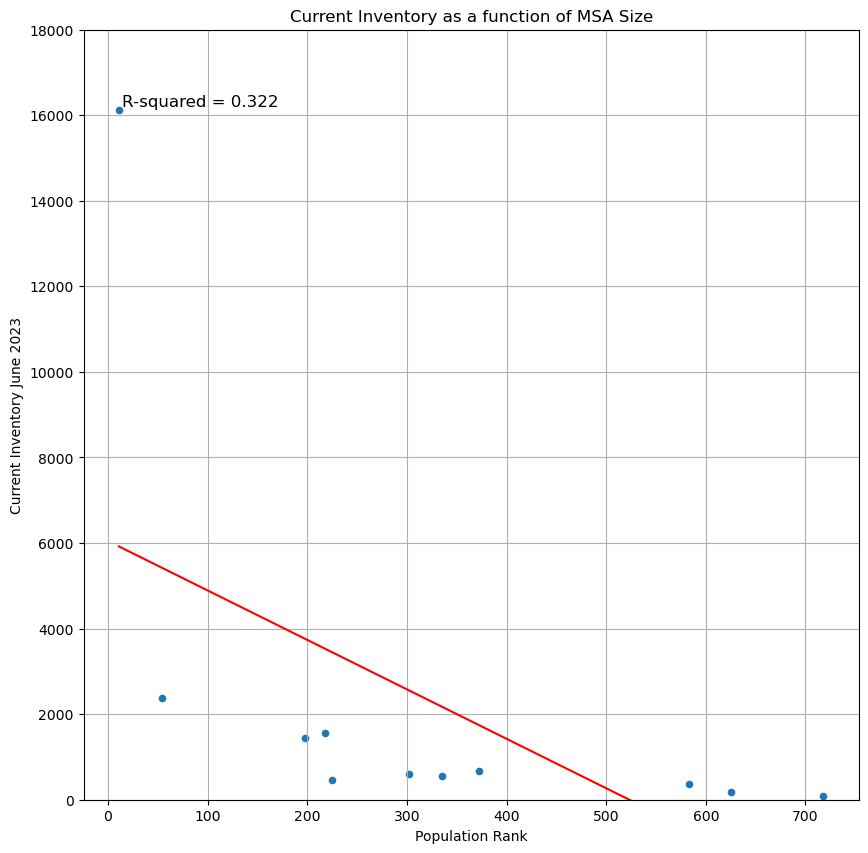

In [27]:
# Create the Scatter plot
az_summary.plot(kind="scatter", x="Population Rank", y="Current Inventory June 2023",
                title="Current Inventory as a function of MSA Size",
                legend=False, grid=True, figsize=(10, 10),
                )
plt.ylim(0, 18000)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(az_summary["Population Rank"],
                                                              az_summary["Current Inventory June 2023"])

# Calculate the R-squared value
r_squared = r_value ** 2

# Plot the regression line and display the R-squared
plt.plot(az_summary["Population Rank"], slope * az_summary["Population Rank"] + intercept, color="red")
plt.text(0.05, 0.9, f"R-squared = {r_squared:.3f}",transform=plt.gca().transAxes, fontsize=12)
plt.show()

**Question 2: How does Phoenix compare to similar MSA?**

* Compare Boston, San Francisco, Denver, Austin, and Phoenix
* Bar chart showing three time periods of inventory for the cities
* Scatter plot of inventory time series
* Bar chart showing three time periods of sales price for the cities
* Scatter of sale price time series

**How has inventory been trending in the five cities?**

In [28]:
# Create DataFrame that only contains the cities of interest
inv_select = inventory_df.loc[(inventory_df["RegionName"] == "Boston, MA") |
                            (inventory_df["RegionName"] == "Denver, CO") |
                            (inventory_df["RegionName"] == "San Francisco, CA") |
                            (inventory_df["RegionName"] == "Austin, TX") |
                            (inventory_df["RegionName"] == "Phoenix, AZ")
                           ]
inv_select

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
10,394404,10,"Boston, MA",msa,MA,7993.0,8777.0,10432.0,12821.0,15297.0,...,10580.0,10375.0,8729.0,6332.0,6095.0,5836.0,7543.0,8073.0,8897.0,8537.0
11,394976,11,"Phoenix, AZ",msa,AZ,25768.0,26865.0,28519.0,28333.0,27669.0,...,25105.0,25039.0,23156.0,20375.0,20488.0,19896.0,19846.0,18567.0,17171.0,16125.0
12,395057,12,"San Francisco, CA",msa,CA,4111.0,5277.0,6589.0,7224.0,8162.0,...,8946.0,8645.0,7057.0,5001.0,4593.0,5010.0,5642.0,5955.0,6524.0,6347.0
19,394530,19,"Denver, CO",msa,CO,7401.0,7918.0,9478.0,10400.0,11502.0,...,10852.0,10263.0,8700.0,6988.0,6755.0,6576.0,7681.0,8116.0,8897.0,9845.0
29,394355,29,"Austin, TX",msa,TX,6704.0,7149.0,8322.0,9361.0,10047.0,...,12516.0,11992.0,10785.0,9333.0,9112.0,8833.0,10105.0,11084.0,11860.0,12332.0


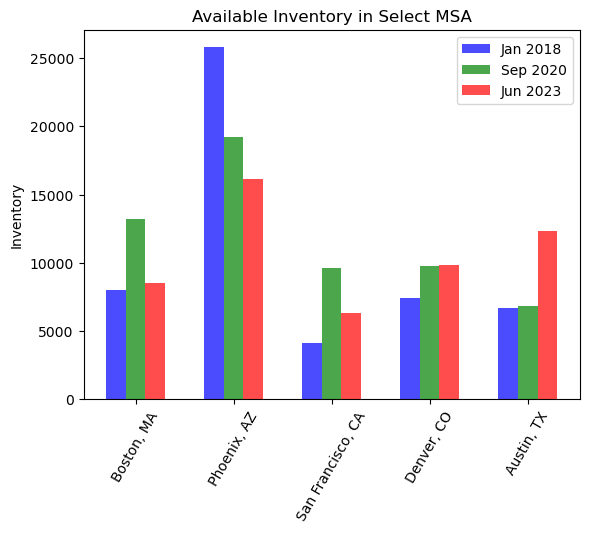

In [29]:
# Create Bar Chart showing inventory of the five cities for three different time periods
# Create an offset for each bar
bar_width = 0.2
offset = np.arange(len(inv_select['RegionName']))

# Plot all three y-values on the same graph with an offset for each bar
plt.bar(offset - bar_width, inv_select['2018-01-31'], width=bar_width, color='blue', alpha=0.7, label='Jan 2018')
plt.bar(offset, inv_select['2020-09-30'], width=bar_width, color='green', alpha=0.7, label='Sep 2020')
plt.bar(offset + bar_width, inv_select['2023-06-30'], width=bar_width, color='red', alpha=0.7, label='Jun 2023')

# Put labels and descriptors on the graph
plt.ylabel('Inventory')
plt.title('Available Inventory in Select MSA')
plt.xticks(offset, inv_select['RegionName'], rotation=60)
plt.legend()

# Display the plot
plt.show()

In [30]:
# Drop unnecessary values to make transpose easier
inv_select = inv_select.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)

# Transpose the dataset to make columns contain specific information to only the MSA
inv_t = inv_select.transpose().reset_index()

# This will move the city name into the index and make the DataFrame more readable
inv_t.columns = inv_t.iloc[0]
inv_t = inv_t.iloc[1:]
inv_t.rename(columns = {"RegionName":"Date"}, inplace=True)

# Review the DataFrame
inv_t

,Date,"Boston, MA","Phoenix, AZ","San Francisco, CA","Denver, CO","Austin, TX"
1,2018-01-31,7993.0,25768.0,4111.0,7401.0,6704.0
2,2018-02-28,8777.0,26865.0,5277.0,7918.0,7149.0
3,2018-03-31,10432.0,28519.0,6589.0,9478.0,8322.0
4,2018-04-30,12821.0,28333.0,7224.0,10400.0,9361.0
5,2018-05-31,15297.0,27669.0,8162.0,11502.0,10047.0
...,...,...,...,...,...,...
62,2023-02-28,5836.0,19896.0,5010.0,6576.0,8833.0
63,2023-03-31,7543.0,19846.0,5642.0,7681.0,10105.0
64,2023-04-30,8073.0,18567.0,5955.0,8116.0,11084.0
65,2023-05-31,8897.0,17171.0,6524.0,8897.0,11860.0


In [37]:
# Convert Date to Datetime and remove duplicates
inv_t["Date"] = pd.to_datetime(inv_t["Date"])
inv_t = inv_t.loc[~inv_t.index.duplicated(keep='first')]

# Break apart the DataFrame to make plotting easier
boston = inv_t[["Date", "Boston, MA"]]
phoenix = inv_t[["Date", "Phoenix, AZ"]]
sanfran = inv_t[["Date", "San Francisco, CA"]]
denver = inv_t[["Date", "Denver, CO"]]
austin = inv_t[["Date", "Austin, TX"]]

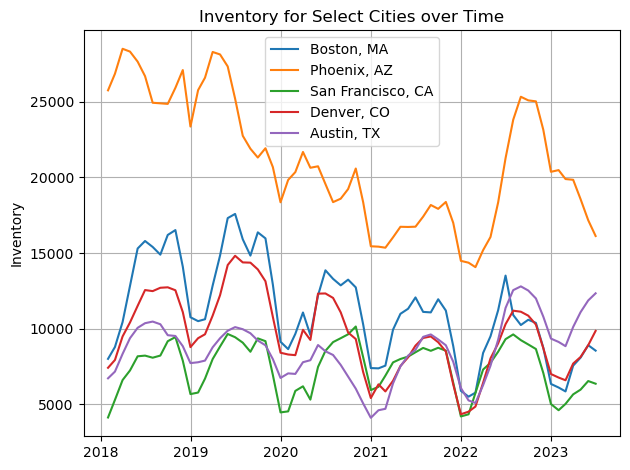

In [41]:
# Plot the inventory for each city
plt.plot(boston["Date"], boston["Boston, MA"], label="Boston, MA")
plt.plot(phoenix["Date"], phoenix["Phoenix, AZ"], label="Phoenix, AZ")
plt.plot(sanfran["Date"], sanfran["San Francisco, CA"], label="San Francisco, CA")
plt.plot(denver["Date"], denver["Denver, CO"], label="Denver, CO")
plt.plot(austin["Date"], austin["Austin, TX"], label="Austin, TX")

# Format the plot Area
plt.ylabel("Inventory")
plt.title("Inventory for Select Cities over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**How have Saleprices been trending in the five cities?**

In [31]:
# Filter out our Saleprice DataFrame to only display the five select cities
saleprice_select = saleprice_df.loc[(saleprice_df["RegionName"] == "Boston, MA") |
                            (saleprice_df["RegionName"] == "Denver, CO") |
                            (saleprice_df["RegionName"] == "San Francisco, CA") |
                            (saleprice_df["RegionName"] == "Austin, TX") |
                            (saleprice_df["RegionName"] == "Phoenix, AZ")
                           ]
saleprice_select

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31
10,394404,10,"Boston, MA",msa,MA,310000.0,329900.0,329000.0,344360.0,359900.0,...,630000.0,602000.0,589000.0,600000.0,570000.0,560000.0,550000.0,605000.0,627750.0,650500.0
11,394976,11,"Phoenix, AZ",msa,AZ,225000.0,225000.0,227000.0,227847.0,225000.0,...,458100.0,449000.0,449900.0,430000.0,415000.0,422000.0,422000.0,430000.0,434000.0,440000.0
12,395057,12,"San Francisco, CA",msa,CA,542000.0,535000.0,525000.0,515000.0,490000.0,...,1025000.0,1059750.0,1078000.0,1050000.0,940000.0,900000.0,919000.0,1038000.0,1080000.0,1100000.0
19,394530,19,"Denver, CO",msa,CO,225000.0,226000.0,227750.0,230000.0,235700.0,...,587225.0,585000.0,578000.0,566742.0,550000.0,537863.0,565000.0,574000.0,585000.0,598000.0
29,394355,29,"Austin, TX",msa,TX,178950.0,188000.0,184995.0,190000.0,192500.0,...,510000.0,495000.0,484000.0,470000.0,450000.0,460000.0,450000.0,462990.0,479495.0,480000.0


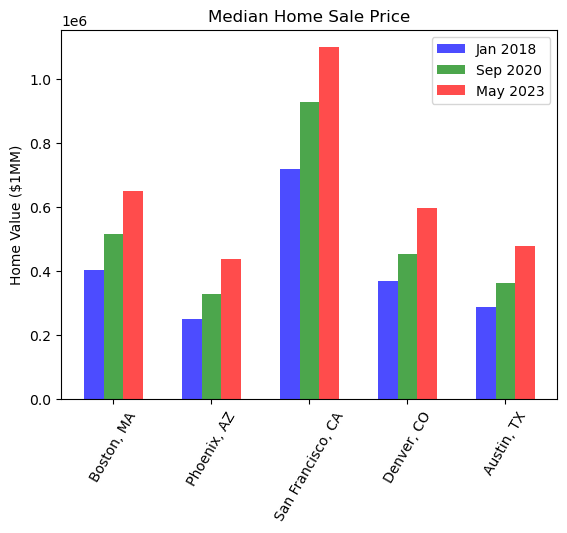

In [32]:
# Create Bar Chart showing sale price of the five cities for three different time periods
# Create an offset for each bar
bar_width = 0.2
offset = np.arange(len(saleprice_select['RegionName']))

# Plot all three y-values on the same graph with an offset for each bar
plt.bar(offset - bar_width, saleprice_select['2018-01-31'], width=bar_width, color='blue', alpha=0.7, label='Jan 2018')
plt.bar(offset, saleprice_select['2020-09-30'], width=bar_width, color='green', alpha=0.7, label='Sep 2020')
plt.bar(offset + bar_width, saleprice_select['2023-05-31'], width=bar_width, color='red', alpha=0.7, label='May 2023')

# Put labels and descriptors on the graph
plt.ylabel('Home Value ($1MM)')
plt.title('Median Home Sale Price')
plt.xticks(offset, saleprice_select['RegionName'], rotation=60)
plt.legend()

# Display the plot
plt.show()

In [33]:
# Drop unnecessary values to make transpose easier
saleprice_select = saleprice_select.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)

# Transpose the dataset to make columns contain specific information to only the MSA
saleprice_t = saleprice_select.transpose().reset_index()

# This will move the city name into the index and make the DataFrame more readable
saleprice_t.columns = saleprice_t.iloc[0]
saleprice_t = saleprice_t.iloc[1:]
saleprice_t.rename(columns = {"RegionName":"Date"}, inplace=True)

# Review the DataFrame
saleprice_t

,Date,"Boston, MA","Phoenix, AZ","San Francisco, CA","Denver, CO","Austin, TX"
1,2008-02-29,310000.0,225000.0,542000.0,225000.0,178950.0
2,2008-03-31,329900.0,225000.0,535000.0,226000.0,188000.0
3,2008-04-30,329000.0,227000.0,525000.0,227750.0,184995.0
4,2008-05-31,344360.0,227847.0,515000.0,230000.0,190000.0
5,2008-06-30,359900.0,225000.0,490000.0,235700.0,192500.0
...,...,...,...,...,...,...
180,2023-01-31,560000.0,422000.0,900000.0,537863.0,460000.0
181,2023-02-28,550000.0,422000.0,919000.0,565000.0,450000.0
182,2023-03-31,605000.0,430000.0,1038000.0,574000.0,462990.0
183,2023-04-30,627750.0,434000.0,1080000.0,585000.0,479495.0


In [34]:
# Convert Date to Datetime and remove duplicates
saleprice_t["Date"] = pd.to_datetime(saleprice_t["Date"])
saleprice_t = saleprice_t.loc[~saleprice_t.index.duplicated(keep='first')]

# Break apart the DataFrame to make plotting easier
boston = saleprice_t[["Date", "Boston, MA"]]
phoenix = saleprice_t[["Date", "Phoenix, AZ"]]
sanfran = saleprice_t[["Date", "San Francisco, CA"]]
denver = saleprice_t[["Date", "Denver, CO"]]
austin = saleprice_t[["Date", "Austin, TX"]]

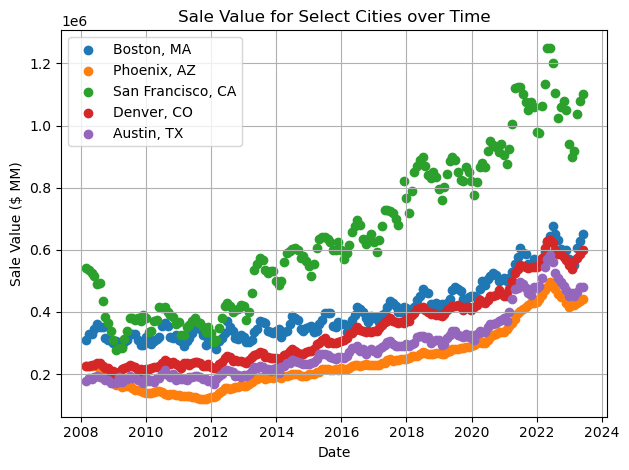

In [35]:
# Plot the sale value for each city
plt.scatter(boston["Date"], boston["Boston, MA"], label="Boston, MA")
plt.scatter(phoenix["Date"], phoenix["Phoenix, AZ"], label="Phoenix, AZ")
plt.scatter(sanfran["Date"], sanfran["San Francisco, CA"], label="San Francisco, CA")
plt.scatter(denver["Date"], denver["Denver, CO"], label="Denver, CO")
plt.scatter(austin["Date"], austin["Austin, TX"], label="Austin, TX")

# Format the plot Area
plt.xlabel("Date")
plt.ylabel("Sale Value ($ MM)")
plt.title("Sale Value for Select Cities over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**What is the relationship between Inventory and Sale Price**

In [ ]:
# Merge dataframes for select cities to drop out dates that don't match

**BONUS - Let's check in on our friends in Texas**

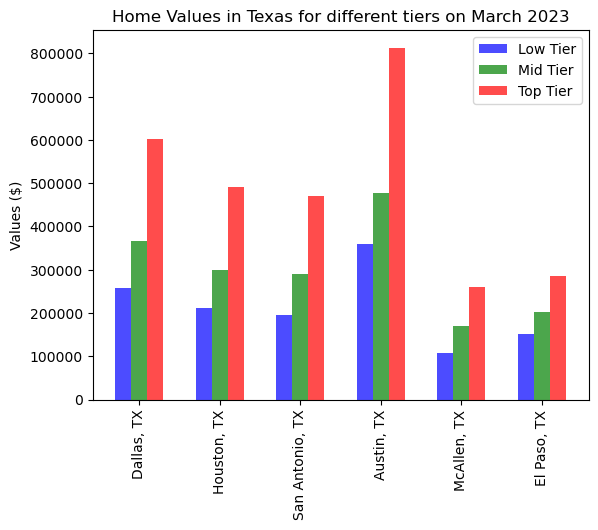

In [36]:
# Example Bar Chart to compare a State's MSAs
texas = zhvi_all_df.loc[(zhvi_all_df["StateName"] == "TX") &
                        (zhvi_all_df["SizeRank"] <= 100)]

# Create an offset for each bar
bar_width = 0.2
offset = np.arange(len(texas['RegionName']))

# Plot all three y-values on the same graph with an offset for each bar
plt.bar(offset - bar_width, texas['2023-03-31_low'], width=bar_width, color='blue', alpha=0.7, label='Low Tier')
plt.bar(offset, texas['2023-03-31'], width=bar_width, color='green', alpha=0.7, label='Mid Tier')
plt.bar(offset + bar_width, texas['2023-03-31_top'], width=bar_width, color='red', alpha=0.7, label='Top Tier')

# Put labels and descriptors on the 
plt.ylabel('Values ($)')
plt.title('Home Values in Texas for different tiers on March 2023')
plt.xticks(offset, texas['RegionName'], rotation=90)
plt.legend()

# Display the plot
plt.show()